# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

In [1]:
#Problems
#1. When you run question 1 first time it bugs
#Question 1 says "Illustrate". I think they want a graph even though a tabel is easier to read. 
#What is run regression for?
#Correct everything to english
#Question 2 has wrong test

Imports and set magics:

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
import HouseholdSpecializationModel as model


# Initialize class
hsm = model.HouseholdSpecializationModelClass()

# Question 1

**Explain how you solve the model**

In [3]:
#We import the model above. For a start we get the solution. 

#Based on consumer problem in lecture 6. We are looping over the answers
def print_table():
    """this function defines a table that plots the values of HF/HM
    for the specified values of alpha and sigma"""
    
    # a. empty text
    text = ''
    
    text += f'{"Alpha/Sigma":<7s}{"":1s}'

    # b. top header
    for sigma in np.linspace(0.5,1.5,3):
       hsm.par.sigma=sigma
       text += f'{sigma:8.2f}' #have sigma as the column-values
    text += '\n' + '-'*40 + '\n' # we add horizontal separator
    
    # c. body
    for i,alpha in enumerate(np.linspace(0.25,0.75,3)):
        hsm.par.alpha=alpha
        #tilføjer det her for at skippe det første linjeskift, ellers så kommer der en tom linje som den første række i tabellen. 
        if i > 0: 
            text += '\n'
        text += f'{alpha:10.2f} |' #alpha as row-values and with a vertical separator
        for sigma in np.linspace(0.5,1.5,3): 
            hsm.par.sigma=sigma
            dsol = hsm.solve_discrete() #call the solve function
            text += f'{dsol.HF_HM:8.2f}' #plot values 
    
    #d. reset values of alpha and sigma:
    
    hsm.par.alpha = 0.5
    hsm.par.sigma = 1.0
    
    # d. print
    print(f"Table of HF/HM values:\n{text}")

print_table()

c:\Users\Bruger\IntroProg\projects-2023-andershuus_christianfogel\inauguralproject\HouseholdSpecializationModel.py:63: RuntimeWarning: divide by zero encountered in reciprocal
  H= ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+
c:\Users\Bruger\IntroProg\projects-2023-andershuus_christianfogel\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Table of HF/HM values:
Alpha/Sigma     0.50    1.00    1.50
----------------------------------------
      0.25 |    0.55    0.31    0.21
      0.50 |    1.00    1.00    1.00
      0.75 |    1.83    3.25    4.67


# Question 2

Explain your code and procedure

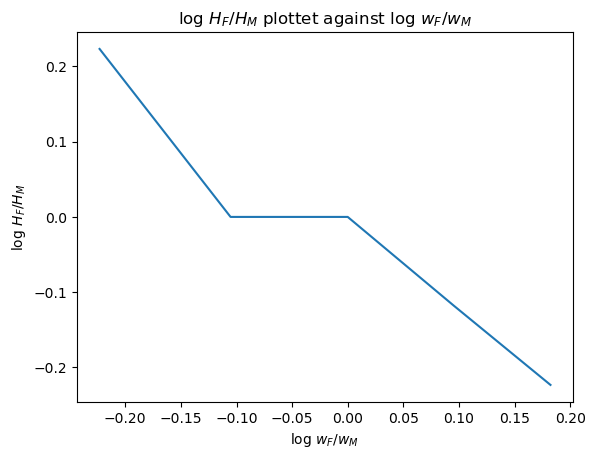

In [4]:
# a. create the figure
fig = plt.figure() 
#first we create a figure object by initializing the plt.figure

# b. plot
ax = fig.add_subplot(1,1,1) 
#we only add one subplot so the ax is basically the entire figure.

ax.plot(np.log(hsm.par.wF_vec),hsm.solve_wF_vec(discrete=True)) 
#x-axis: we plot log(wF_vec), since wM is fixed at 1, 
#so it is already taken into account in this vector.
#Note: we only take the log here, so we don't need to store the log values
#y-axis: we call the solve_wF_vec method from our class directly,
#so we again don't need to store the values.

ax.set_title('log $H_F/H_M$ plottet against log $w_F/w_M$') #set title
ax.set_xlabel('log $w_F/w_M$') #set label for x-axis
ax.set_ylabel('log $H_F/H_M$'); #set label for y-axis

# Question 3

Explain your code and procedure

In [9]:
# We cannot use the same procedure. Simply to many options. 


#Missing 
#3. Does it match the one above?


csol=hsm.solve_continously
for wF in np.linspace(0.8,1.2,5): 
    hsm.par.wF=wF
    hsm.solve_continously() #plot values 



-0.2231435513142097 = 0.22519958544128285
-0.10536051565782628 = 9.754729058551197e-05
0.0 = 2.154359799344263e-09
0.09531017980432493 = -8.680131447473675e-05
0.1823215567939546 = -0.18662625800161153


ADD CONCISE CONLUSION.